In [15]:
#找出WCSS
import pandas as pd

dataset = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/customers.csv')
x = dataset.iloc[:,3:5].values

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [17]:
kmeans.inertia_

44448.45544793371

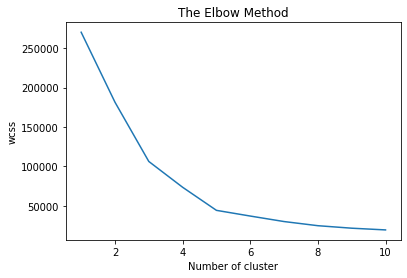

In [18]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [23]:
#计算Silhouette
from sklearn import metrics
print(metrics.silhouette_score(x,y_kmeans))

0.553931997444648


In [33]:
import matplotlib.pyplot as plt
sil = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans = kmeans.fit_predict(x)
    sil.append(metrics.silhouette_score(x,y_kmeans))
sil

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5264283703685728,
 0.45827056882053113,
 0.4565077334305076,
 0.45925273534781125]

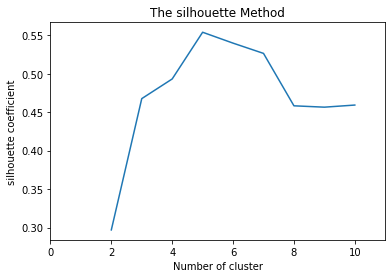

In [34]:
plt.plot(range(2,11),sil)
plt.xlim([0,11])
plt.title('The silhouette Method')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette coefficient')
plt.show()

In [49]:
#比较不同的分群方法
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#ward
ward = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_ward = ward.fit_predict(x)

#complete
complete = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_complete = complete.fit_predict(x)

#kmeans
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means = kmeans.fit_predict(x)

for est,title in zip([y_ward,y_complete,y_kmeans],['ward','complete','kmeans']):
    print(title,metrics.silhouette_score(x,est))

ward 0.5529945955148897
complete 0.5529945955148897
kmeans 0.45925273534781125
